# An example of Iris dataset in Logistic Regression

In [1]:
#Starting with importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#Load the dataset
import sklearn.datasets as sd
data = sd.load_iris()

# Some information about data

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
len(data.data)

150

In [7]:
data.data[0:9]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2]])

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Create a dataframe with the features we need

In [9]:
df = pd.DataFrame(data.data,columns=['Sepal_Length_CM','Sepal_Width_CM','Petal_Length_CM','Petal_Width_CM'])

In [10]:
#Add the target column to data
df['Species'] = data.target

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sepal_Length_CM  150 non-null    float64
 1   Sepal_Width_CM   150 non-null    float64
 2   Petal_Length_CM  150 non-null    float64
 3   Petal_Width_CM   150 non-null    float64
 4   Species          150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
df.describe()

,Sepal_Length_CM,Sepal_Width_CM,Petal_Length_CM,Petal_Width_CM,Species
count,150.000,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199,1.000
std,0.828,0.436,1.765,0.762,0.819
min,4.300,2.000,1.000,0.100,0.000
25%,5.100,2.800,1.600,0.300,0.000
50%,5.800,3.000,4.350,1.300,1.000
75%,6.400,3.300,5.100,1.800,2.000
max,7.900,4.400,6.900,2.500,2.000


In [13]:
# A last check before training
df.head()

,Sepal_Length_CM,Sepal_Width_CM,Petal_Length_CM,Petal_Width_CM,Species
0,5.100,3.500,1.400,0.200,0
1,4.900,3.000,1.400,0.200,0
2,4.700,3.200,1.300,0.200,0
3,4.600,3.100,1.500,0.200,0
4,5.000,3.600,1.400,0.200,0


# Split the data into two as train and test sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop('Species',axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
X_train

,Sepal_Length_CM,Sepal_Width_CM,PetalLengthCM,PetalWidthCM
45,4.800,3.000,1.400,0.300
33,5.500,4.200,1.400,0.200
5,5.400,3.900,1.700,0.400
86,6.700,3.100,4.700,1.500
128,6.400,2.800,5.600,2.100
...,...,...,...,...
97,6.200,2.900,4.300,1.300
132,6.400,2.800,5.600,2.200
124,6.700,3.300,5.700,2.100
146,6.300,2.500,5.000,1.900


In [18]:
X_test.shape

(30, 4)

In [19]:
y_train.shape

(120,)

In [21]:
y_test.shape

(30,)

# Start with the training

In [24]:
# Import our Log. Regression module
from sklearn.linear_model import LogisticRegression

In [25]:
# Create the lr object
lr=LogisticRegression()

In [26]:
# Train the data
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#Make the prediction based on what the data learned from X_train and y_train
lr.predict(X_test)

array([1, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       1, 0, 0, 1, 1, 2, 0, 2])

In [29]:
lr.score(X_test,y_test)

0.9333333333333333

# Compare the predictions vs. the actual y test


The values in below DataFrame 0,1, and 2 represent the Species in the Iris datasets. So;
</br>
<ul>
<li>0: Iris-setosa</li>
<li>1: Iris-versicolor</li>
<li>2: Iris-virginica</li>
</ul>

In [36]:
comp_df = pd.DataFrame(y_test)
comp_df['Predictions'] = lr.predict(X_test)


,Species,Predictions
72,1,1
91,1,1
146,2,2
130,2,2
142,2,2
70,1,2
19,0,0
37,0,0
107,2,2
97,1,1


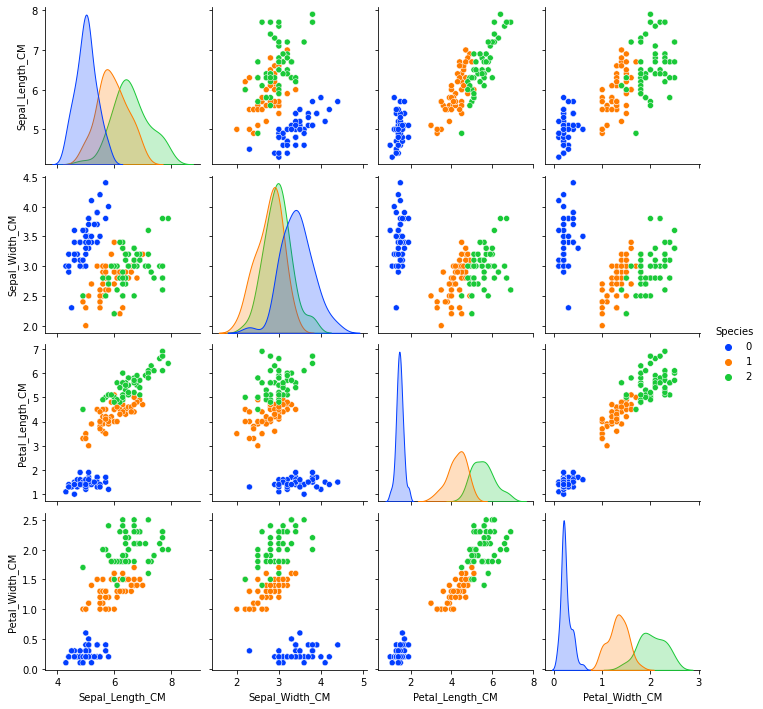

In [30]:
sns.pairplot(df,hue='Species',palette='bright')